# LOAD THE DATA

In [23]:
import numpy as np
import pandas as pd
data= pd.read_csv("D://housing.csv")
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52      

In [24]:
data.shape

(20640, 10)

In [25]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

# HANDLE MISIING VALUES

In [26]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [27]:
print ("Total_bedrooms column Mode is  "+str(data["total_bedrooms"].mode())+"\n")
print(data["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


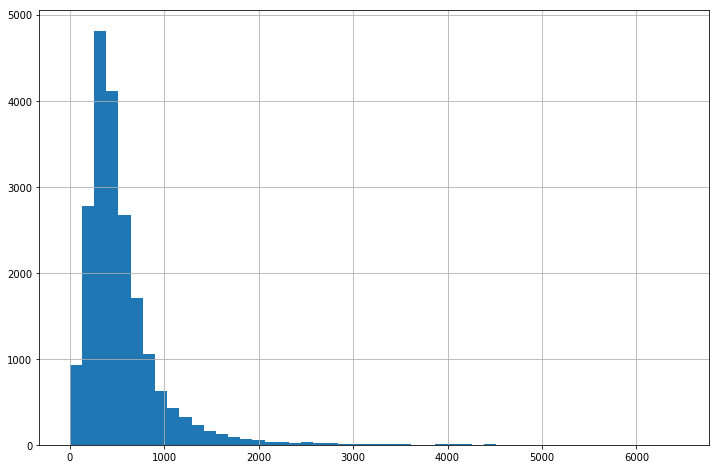

In [28]:
import matplotlib.pyplot as plt
total_bedroms = data[data["total_bedrooms"].notnull()]["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

In [29]:
from sklearn.preprocessing import Imputer
print(data.iloc[:,4:5].head())
imputer = Imputer(np.nan,strategy ="mean")
imputer.fit(data.iloc[:,4:5])
data.iloc[:,4:5] = imputer.transform(data.iloc[:,4:5])
data.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# ENCODE CATEGORICAL DATA

In [30]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
print(data["ocean_proximity"].value_counts())
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])
data["ocean_proximity"].value_counts()
data.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


# SPLIT THE DATA INTO 80% TRAINING AND 20% TEST

In [31]:
data_ind = data.drop("median_house_value",axis=1)
print(data_ind.head())
data_dep = data["median_house_value"]
print("Medain Housing Values")
print(data_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3  
Medain Housing Values
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_ind,data_dep,test_size=0.2,random_state=42)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


# STANDARDIZE  DATA

In [33]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019e-01  1.38415277e-01
  -1.49476515e-03  1.21850767e-01  2.20531996e-01 -7.08659050e-01
  -1.12426599e-01]
 [-1.42487026e+00  1.00947776e+00  1.85617335e+00  5.46309967e-01
  -1.49476515e-03 -1.02419310e-01  1.21539643e+00 -2.104

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# PERFORM LINEAR REGRESSION

In [34]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression(n_jobs=-1)
linearRegModel.fit(X_train,y_train)
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


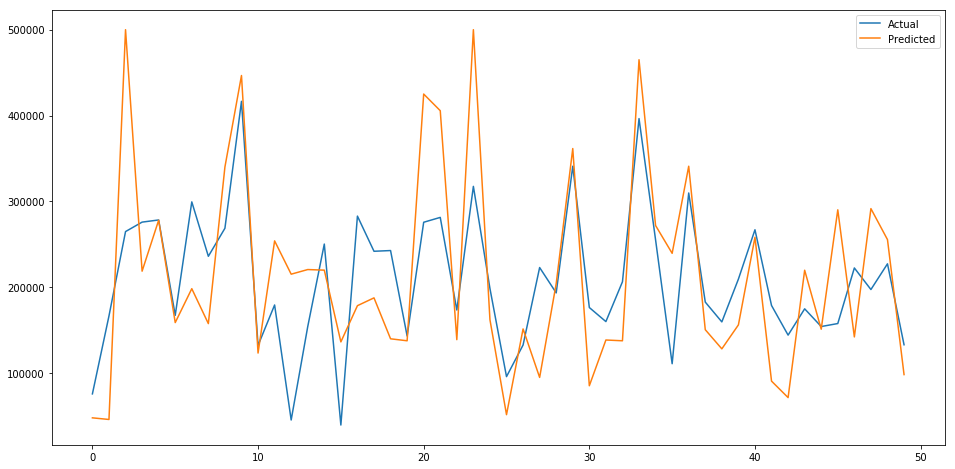

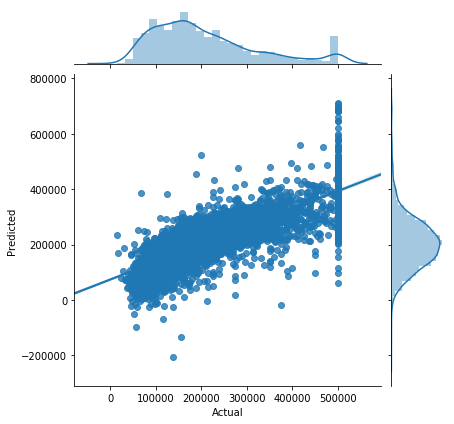

In [35]:
import seaborn as sns
y_pred = linearRegModel.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [36]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

71098.69982050032
69361.0714290645


# PERFORM DECISION TREE REGRESSION

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 60503.2556391 ,  75919.52054795, 478283.56097561, ...,
       488611.25      ,  75919.52054795, 211563.96963563])

61171.4849264599


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


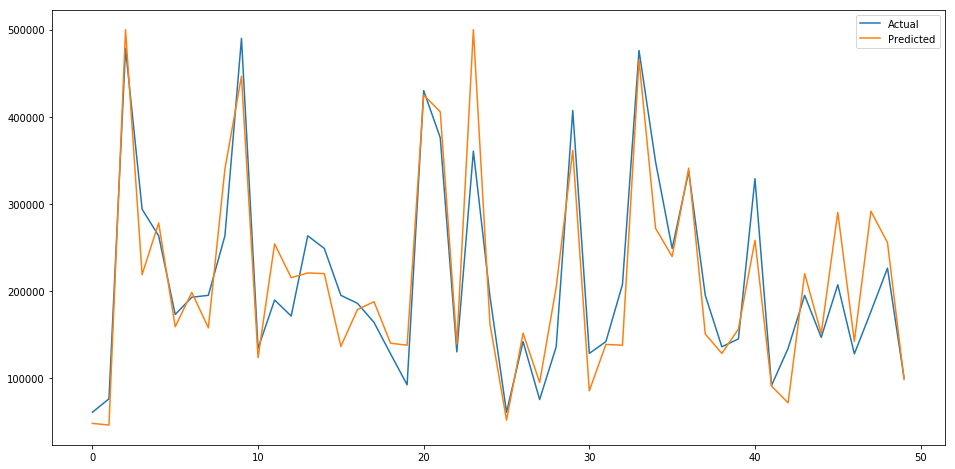

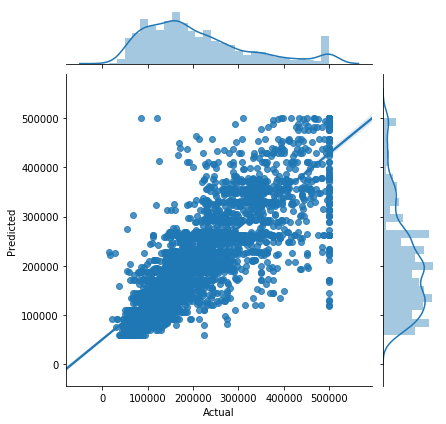

In [39]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# PERFORM RANDOM FOREST REGRESSION

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
rfReg_y_pred = rfReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

50372.069467908506


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


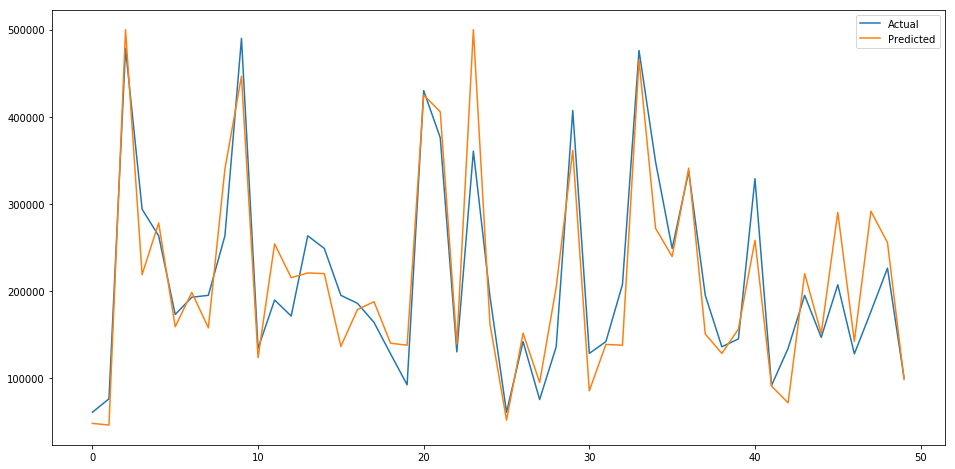

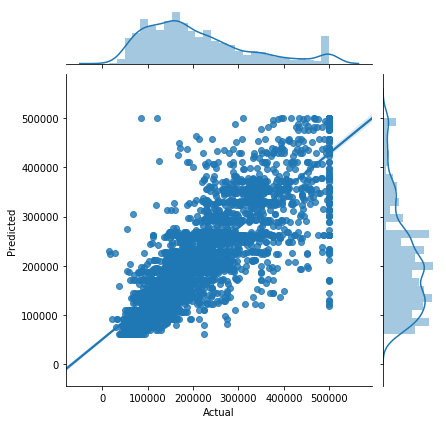

In [42]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")